# Introduction to Matplotlib

In [1]:
# the %matplotlib inline magic method helps us visualize plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

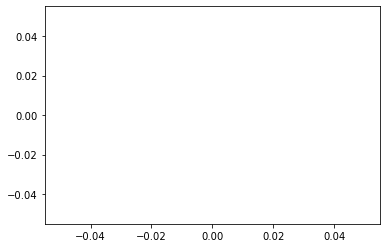

In [7]:
# Simplest plot possible, plots nothing, the ';' at the end of line prevents jupyter from outputing
# the function return value, you can also use plt.show()
plt.plot();

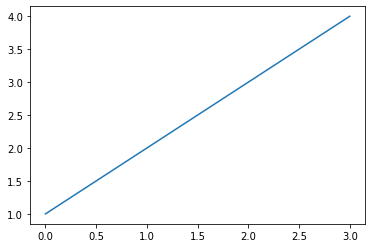

In [9]:
# .plot accepts lists on each of the plots axis
plt.plot([1,2,3,4]);

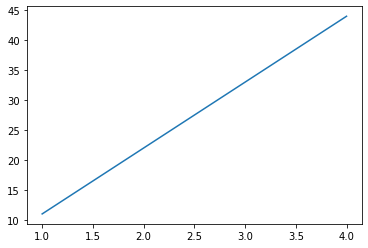

In [10]:
# This is known as stateless plotting in matplotlib, since the library is not maintaing any state
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y);

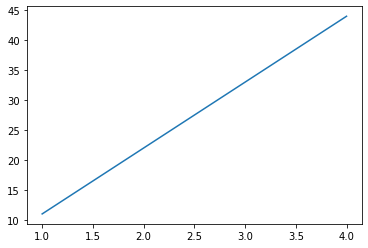

In [13]:
# We can also use an object oriented API for plotting, this is the recommended method
fig, axes = plt.subplots()
axes.plot(x,y);

## The anatomy of a matplotlib plot
<img src="resources/matplotlib-anatomy-of-a-plot.png"/>

### Matplotlib Workflow

1. Import matplotlib
2. Add `%matplotlib inline` magic method
3. Prepare your data for plotting
4. Create a figure
5. Add plots to your figure to visualize your data
6. Customize your plot

In [30]:
# Prepare data
x = np.arange(0, 100, 3)
y = 3*x + 3*np.random.normal(size=x.size)

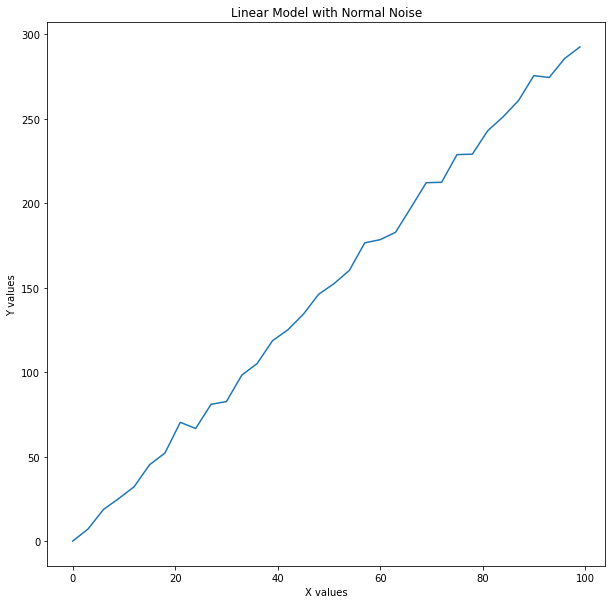

In [34]:
# Creating our figure, figsize parameter sets the figure size
fig, axes = plt.subplots(figsize=(10,10))
# Plot our data
axes.plot(x, y)
# Customizing our Plot
axes.set(title = "Linear Model with Normal Noise",
        xlabel="X values",
        ylabel="Y values");

## Different types of plots

In [45]:
# Let's generate some data
x = np.linspace(0, 2*3.14, 100)
y = np.sin(x)

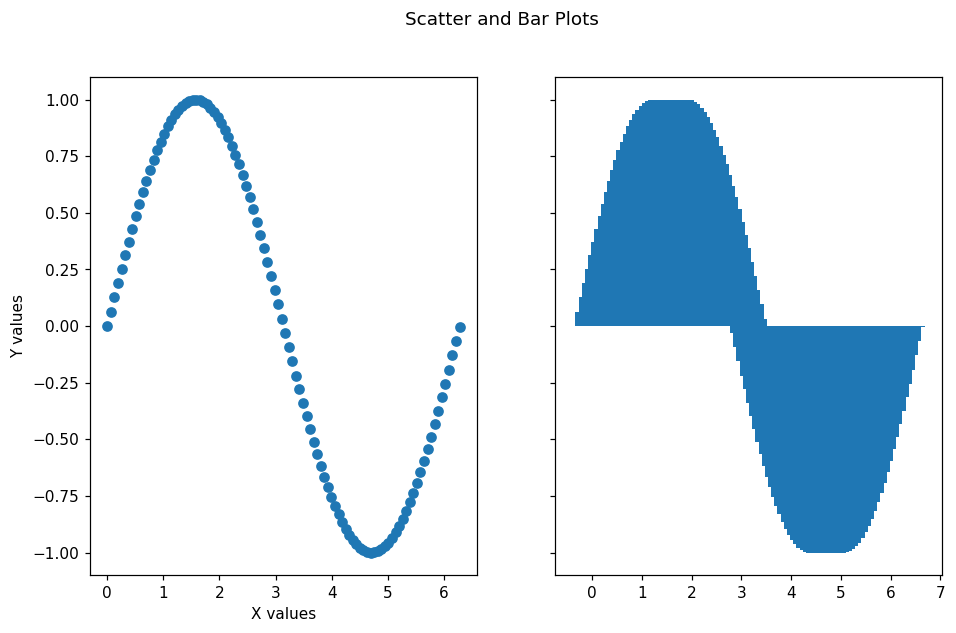

In [83]:
# Creating a figure with 2 subplots, a scatter plot and a bar plot
# Here we are sharing the y-axis label
fig, axs = plt.subplots(1,2, figsize=(10, 6), dpi=110, sharey=True)
fig.suptitle("Scatter and Bar Plots")
axs[0].set(ylabel="Y values", xlabel="X values")
axs[0].scatter(x,y)
axs[1].bar(x,y);

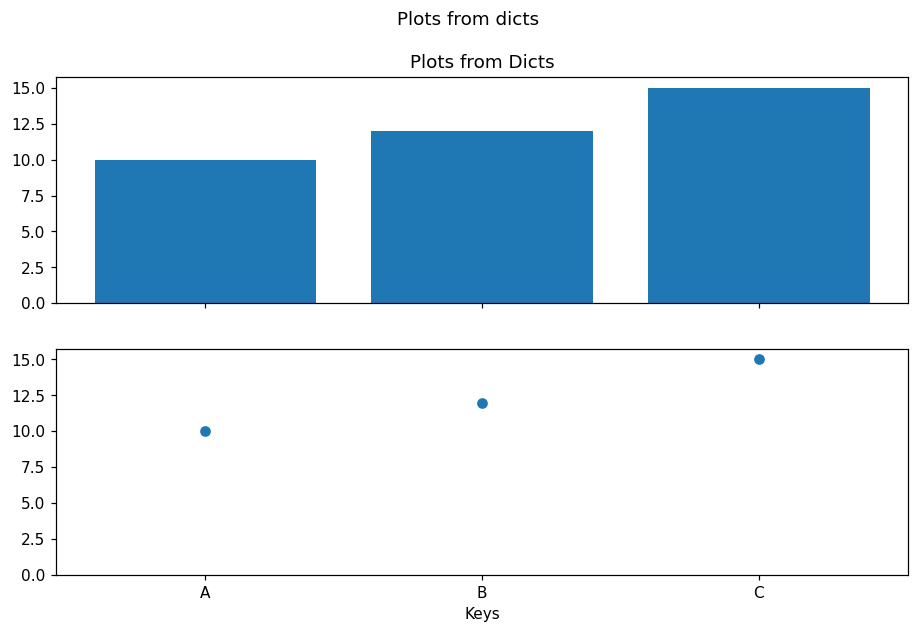

In [105]:
# You can also create plots from dictionaries, here we are sharing the x-axis between plots
data = {"A": 10, "B":12, "C":15}
fig,axs = plt.subplots(nrows = 2, 
                       ncols=1, 
                       figsize=(10, 6), 
                       dpi=110, 
                       sharex=True, 
                       sharey=True)
fig.suptitle("Plots from dicts")
axs[0].set(title="Plots from Dicts")
axs[0].bar(data.keys(), data.values())
axs[1].scatter(data.keys(), data.values())
axs[1].set(xlabel="Keys");

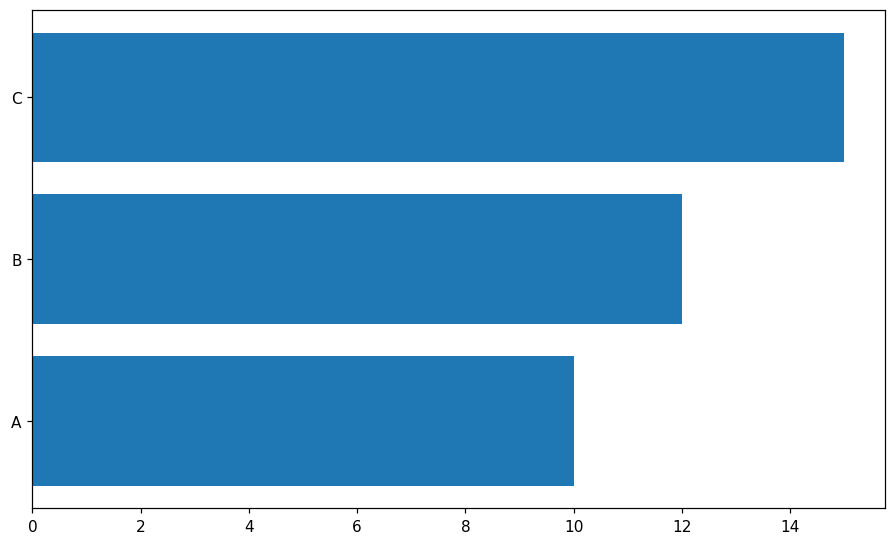

In [96]:
# We can plot horizontal bar graphs
fig, ax = plt.subplots(figsize=(10,6), dpi=110)
ax.barh(list(data.keys()), list(data.values()));

In [99]:
# We can also plot histograms, first we sample 500 values from a standard normal distribution
hist_data = np.random.normal(size=500)

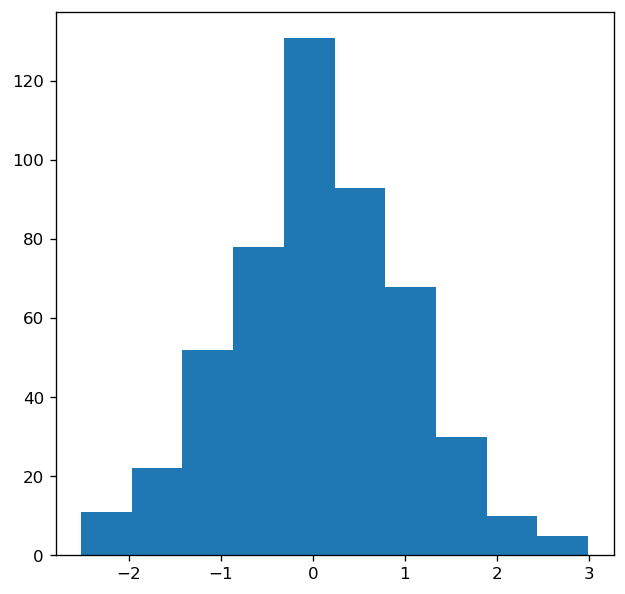

In [103]:
fig, ax = plt.subplots(figsize=(6,6), dpi=120)
ax.hist(hist_data);

## Plotting from pandas dataframes

In [118]:
data_frame = pd.read_csv("resources/car-sales.csv")
# convert the price from string to amount of dollars
data_frame["Price"] = data_frame["Price"].str.replace("[\$,\.]", "").astype(int) / 100
data_frame

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [133]:
total_sold_by_make = data_frame.groupby("Make").sum()["Price"]
total_sold_by_make

array([22000., 19500., 13200., 21750.])

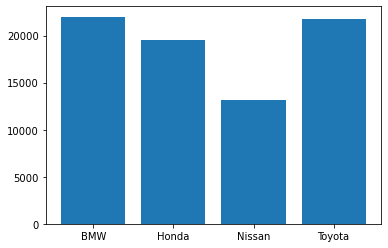

In [135]:
fig, ax = plt.subplots()
ax.bar(total_sold_by_make.keys(), total_sold_by_make.values);

<AxesSubplot:>

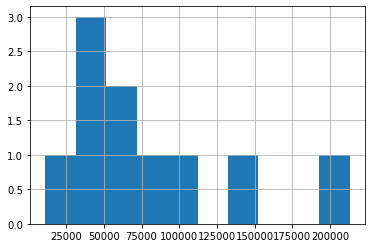

In [136]:
# Pandas also offers a few plotting methods directly from the dataframe
data_frame["Odometer (KM)"].hist()

In [141]:
total_by_color = data_frame.groupby("Colour").sum()["Price"]
total_by_color

Colour
Black    22000.0
Blue     21500.0
Green     4500.0
Red       5000.0
White    23450.0
Name: Price, dtype: float64

<BarContainer object of 5 artists>

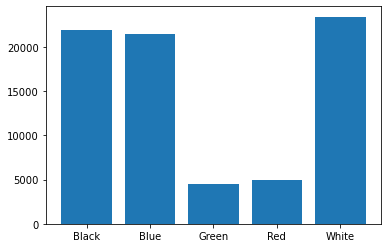

In [143]:
fig, ax = plt.subplots()
ax.bar(total_by_color.keys(), total_by_color.values)

In [144]:
data_frame["Date"] = pd.date_range('1/1/2021', periods=10)
data_frame

,Make,Colour,Odometer (KM),Doors,Price,Date
0,Toyota,White,150043,4,4000.0,2021-01-01
1,Honda,Red,87899,4,5000.0,2021-01-02
2,Toyota,Blue,32549,3,7000.0,2021-01-03
3,BMW,Black,11179,5,22000.0,2021-01-04
4,Nissan,White,213095,4,3500.0,2021-01-05
5,Toyota,Green,99213,4,4500.0,2021-01-06
6,Honda,Blue,45698,4,7500.0,2021-01-07
7,Honda,Blue,54738,4,7000.0,2021-01-08
8,Toyota,White,60000,4,6250.0,2021-01-09
9,Nissan,White,31600,4,9700.0,2021-01-10


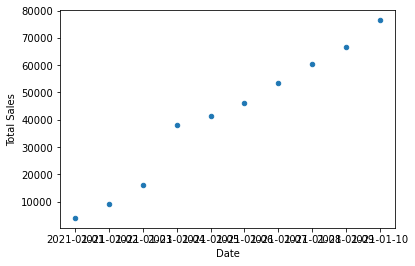

In [170]:
# We can use the kind parameter to change the kind of plot we want pandas to create
data_frame["Total Sales"] = data_frame["Price"].cumsum()
data_frame.plot(x="Date", y="Total Sales", kind='scatter');

In [178]:
x = np.random.rand(10,4)
data = pd.DataFrame(x,columns=["A", "B", "C", "D"])
data

,A,B,C,D
0,0.110561,0.149049,0.656575,0.617940
1,0.435710,0.258537,0.757143,0.833933
2,0.532394,0.671018,0.943782,0.479316
3,0.128723,0.397808,0.208418,0.207902
4,0.334001,0.974828,0.979365,0.838807
5,0.808907,0.091159,0.781887,0.288624
6,0.388832,0.730291,0.431421,0.220096
7,0.993853,0.068283,0.793887,0.638545
8,0.433670,0.695516,0.686571,0.677022
9,0.613764,0.981387,0.533041,0.944869


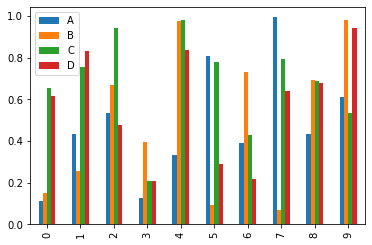

In [182]:
# We can use .plot.bar() to plot all columns at once as a bar graph
data.plot.bar();

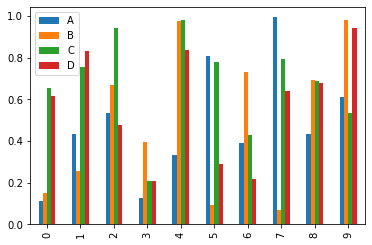

In [181]:
# We can also use the kind parameter
data.plot(kind='bar');

In [185]:
heart_disease = pd.read_csv("resources/heart-disease.csv")
heart_disease.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1


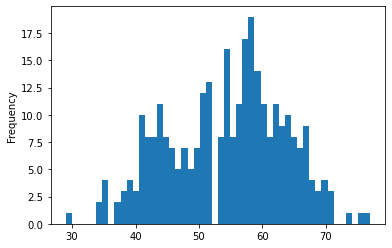

In [190]:
heart_disease["age"].plot.hist(bins=50);

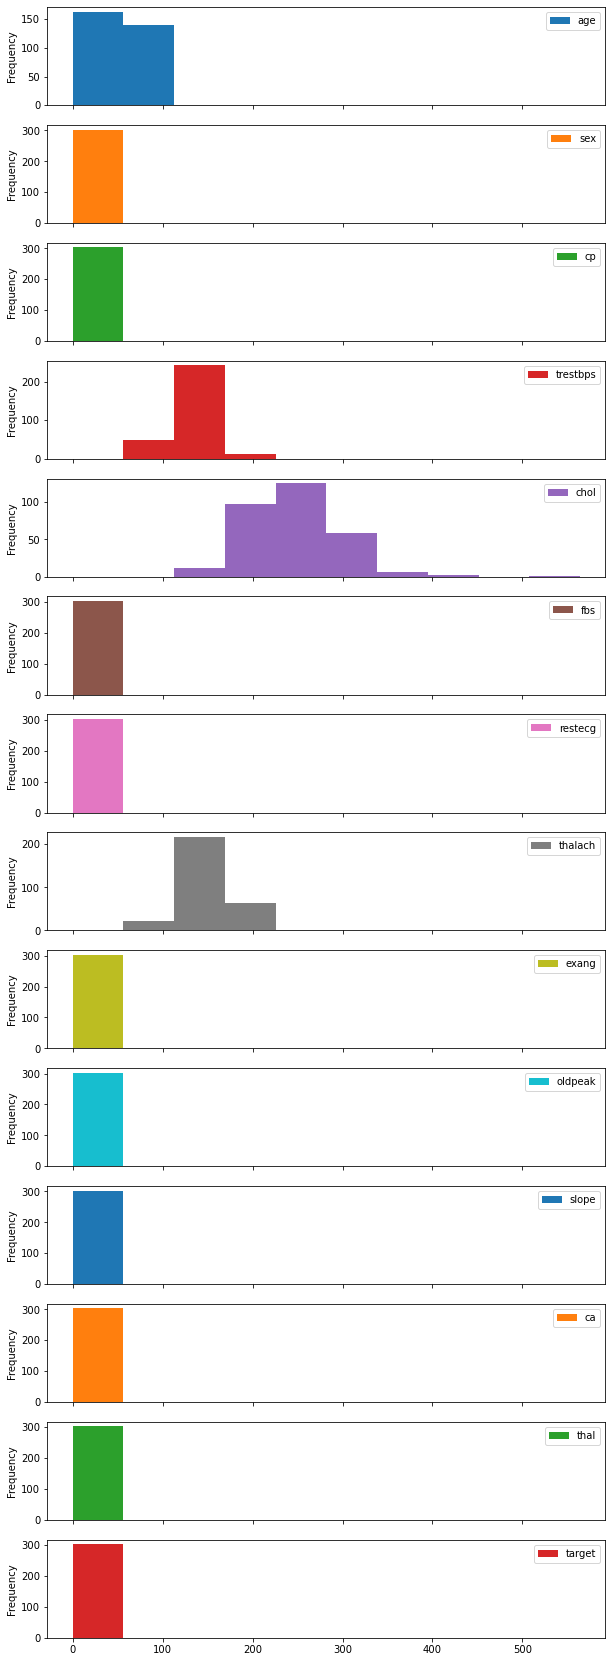

In [202]:
# You can pass matplotlib args to the pandas plot function too
# Here, subplots=True tells pandas to create oen plot for each column
heart_disease.plot.hist(figsize=(10,30), subplots=True);

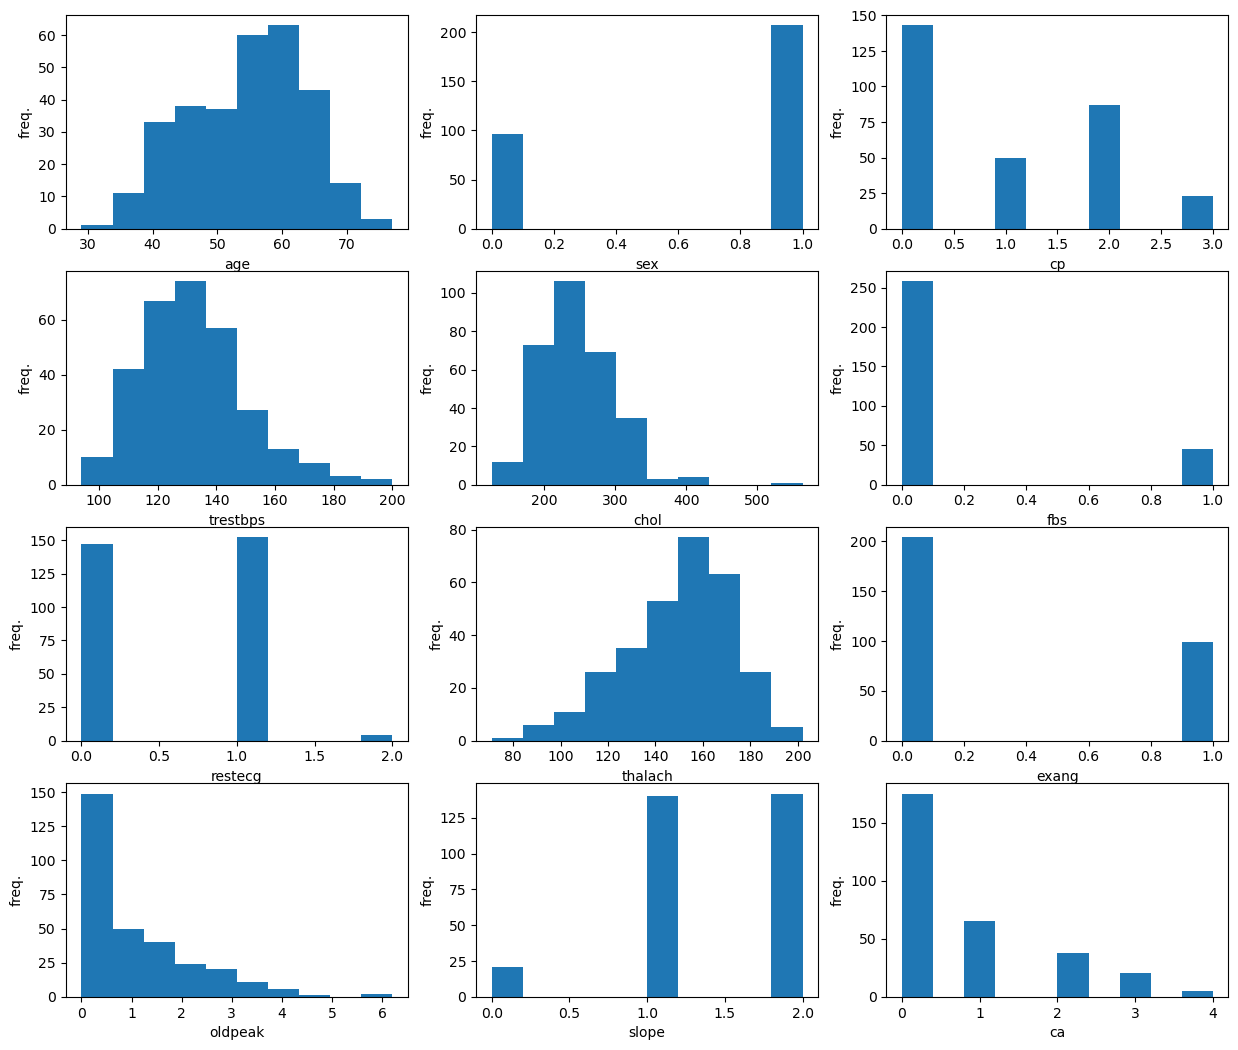

In [222]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,13), dpi=100)
# We created 12 subplots and then matched each one a column (except target and thal)
# and them plotted histogram with x-axis labels for each of them
for ax, column in zip(axs.flatten(), heart_disease.columns[:-2]):
    ax.set(xlabel=column, ylabel="freq.")
    ax.hist(heart_disease[column]);

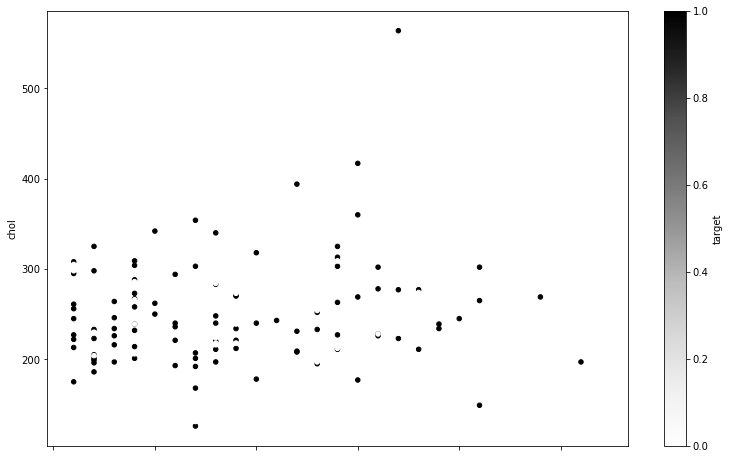

In [226]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            figsize=(13,8));

(45.0, 100.0)

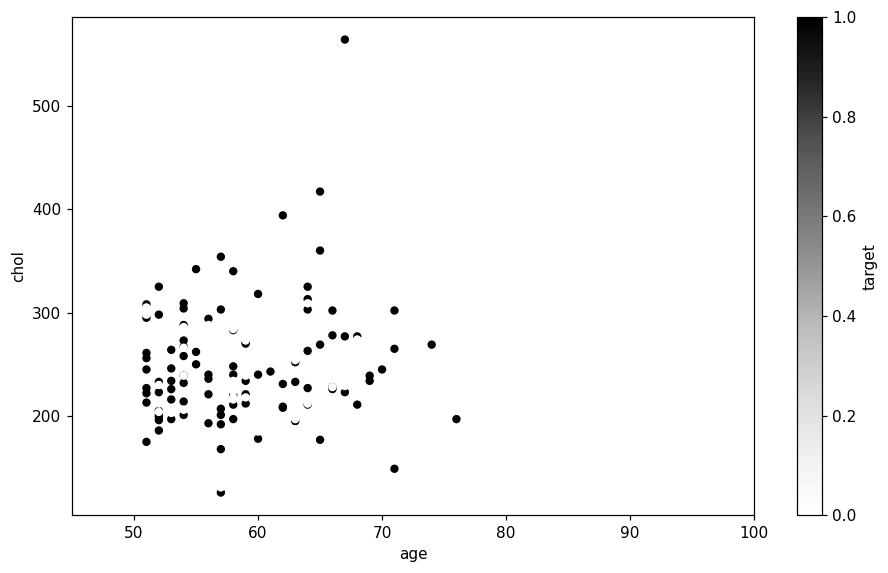

In [233]:
# Using the OO Method we can pass the axis to pandas .plot function to customize our plots
# with greater flexibility
fig, ax = plt.subplots(figsize=(10,6), dpi=110)
over_50.plot(ax=ax, 
            kind='scatter',
            x='age',
            y='chol',
            c='target')
# Sets the limits of the x-axis to 45 to 100
ax.set_xlim(45,100)

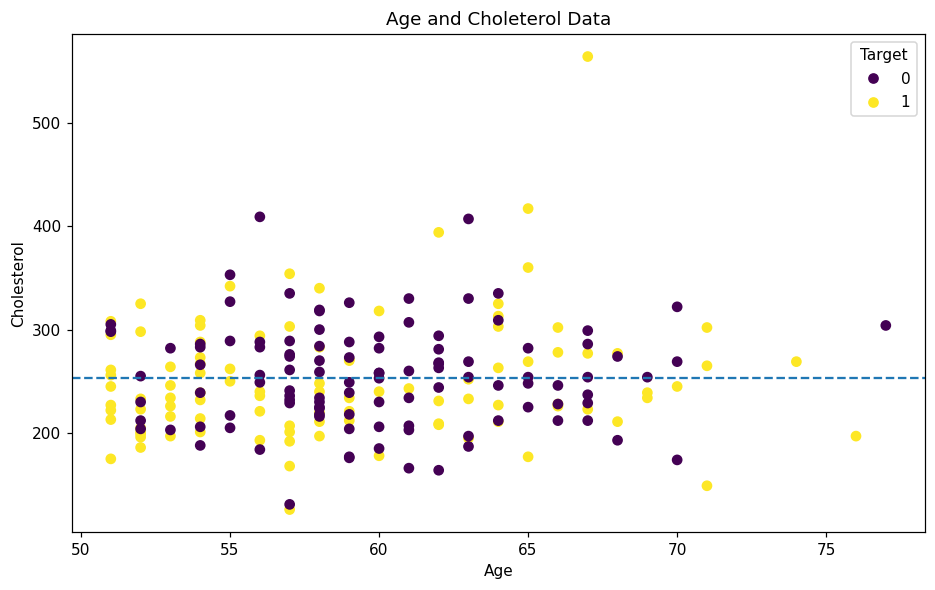

In [255]:
# But usinng the OO method from scratch gives us total control over the plot
fig, ax = plt.subplots(figsize=(10,6), dpi=110)

# Here we save our reference to the created plot so we can use it later
scatter = ax.scatter(x = over_50["age"],
          y = over_50["chol"],
          c = over_50["target"])

# Set some texto on our plot to make it clearer
ax.set(title="Age and Choleterol Data", xlabel="Age", ylabel="Cholesterol")

# Adds a dashed line ath the mean cholesterol value
ax.axhline(over_50["chol"].mean(), linestyle='dashed')

# Add legend to the plot using the reference we saved earlier
ax.legend(*scatter.legend_elements(), title="Target");

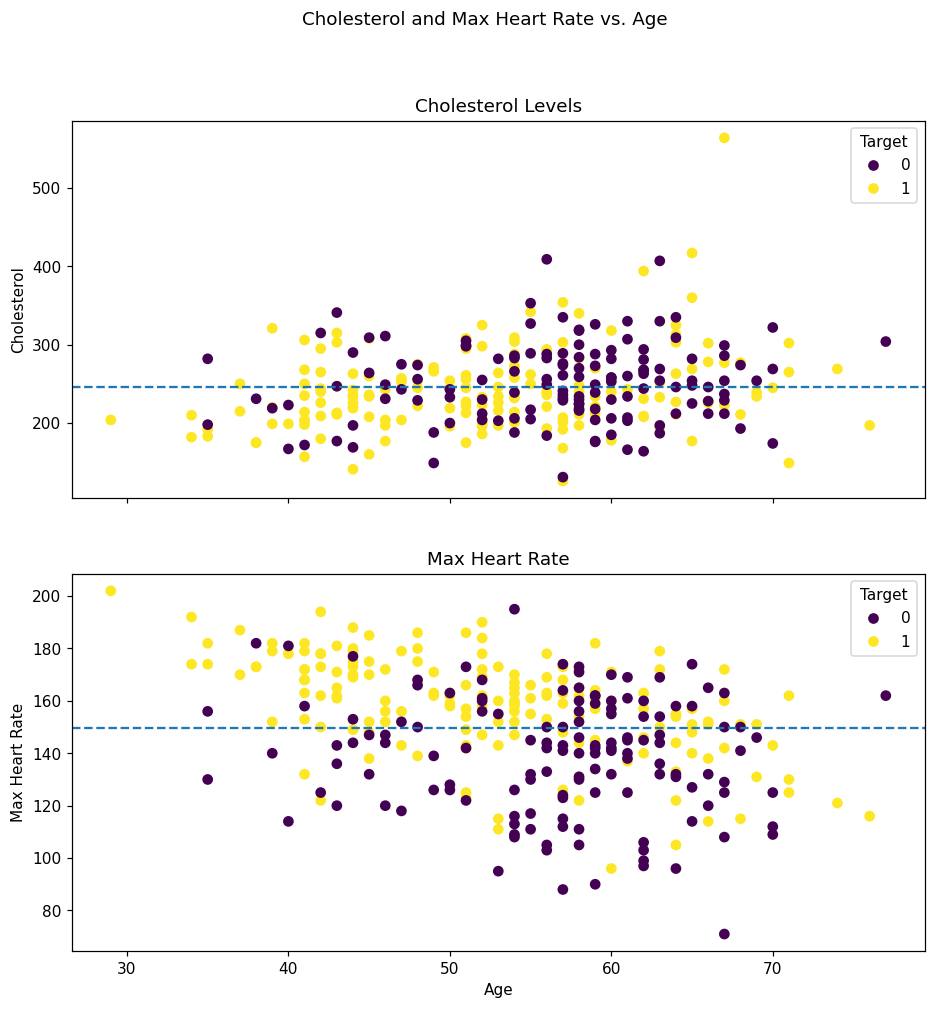

In [257]:
# Create a figure with 2 subplots (axes) sharing the x-axis
fig, axs = plt.subplots(2, 1, figsize=(10, 10), dpi=110, sharex = True)
# Set The figure superior title
fig.suptitle("Cholesterol and Max Heart Rate vs. Age")

# Create the first plot, as above
scatter_1 = axs[0].scatter(x=heart_disease['age'],
              y=heart_disease['chol'],
              c=heart_disease['target'])

axs[0].axhline(heart_disease['chol'].mean(), linestyle='dashed')
axs[0].set(title='Cholesterol Levels', ylabel="Cholesterol")
axs[0].legend(*scatter_1.legend_elements(), title="Target")


# Create a second plot, but using the thalach column
scatter_2 = axs[1].scatter(x=heart_disease['age'],
              y=heart_disease['thalach'],
              c=heart_disease['target'])

axs[1].axhline(heart_disease['thalach'].mean(), linestyle='dashed')
axs[1].set(title='Max Heart Rate', ylabel="Max Heart Rate", xlabel="Age")
axs[1].legend(*scatter_2.legend_elements(), title="Target");

## More Customization Options

In [261]:
# We can take a look at the available styles that matplotlib has for us
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

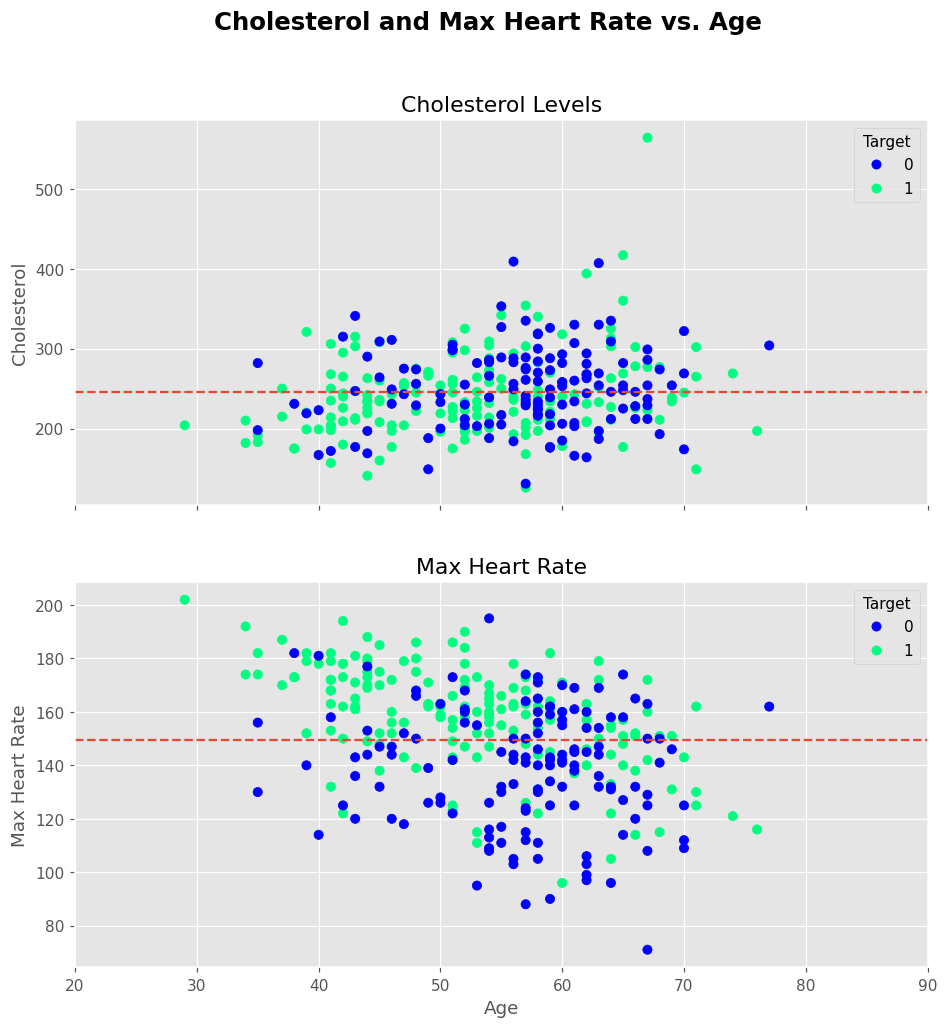

In [307]:
# Using the same code from the plot above we can set the style, we first set the style to default
# as to avoid old styles to interfere with new ones
plt.style.use("default")
plt.style.use('ggplot')
# Create a figure with 2 subplots (axes) sharing the x-axis
fig, axs = plt.subplots(2, 1, figsize=(10, 10), dpi=110, sharex = True)
# Set The figure superior title, here we increased the font size and set it to bold
fig.suptitle("Cholesterol and Max Heart Rate vs. Age", fontsize=16, fontweight='bold')

# Create the first plot, here we use the cmap parameter to define the color map of the plot
scatter_1 = axs[0].scatter(x=heart_disease['age'],
              y=heart_disease['chol'],
              c=heart_disease['target'],
              cmap="winter")

axs[0].axhline(heart_disease['chol'].mean(), linestyle='dashed')
axs[0].set(title='Cholesterol Levels', ylabel="Cholesterol")
axs[0].legend(*scatter_1.legend_elements(), title="Target")


# Create a second plot, but using the thalach column
scatter_2 = axs[1].scatter(x=heart_disease['age'],
              y=heart_disease['thalach'],
              c=heart_disease['target'],
              cmap="winter")

axs[1].axhline(heart_disease['thalach'].mean(), linestyle='dashed')
axs[1].set(title='Max Heart Rate', ylabel="Max Heart Rate", xlabel="Age")
axs[1].set_xlim([20, 90])
axs[1].legend(*scatter_2.legend_elements(), title="Target");